<a href="https://colab.research.google.com/github/zarrinan/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [5]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [6]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')


In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
entities  = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts  = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [13]:
pd.merge

<function pandas.core.reshape.merge.merge>

In [14]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [15]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [16]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [17]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


In [18]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
df = pd.merge(income, lifespan)

In [20]:
income.shape, lifespan.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [21]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


## Explore data

In [22]:
entities[entities.country=='abw'].T

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [23]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [24]:
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [25]:
variables = ['country', 'name', 'world_6region']
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [0]:
df = pd.merge(df, population)

In [27]:
#Preview
pd.merge(df, entities[variables],
        how='inner', left_on='geo', right_on='country').head().T

,0,1,2,3,4
geo,abw,abw,abw,abw,abw
time,1800,1801,1802,1803,1804
income_per_person_gdppercapita_ppp_inflation_adjusted,833,833,833,833,833
life_expectancy_years,34.42,34.42,34.42,34.42,34.42
population_total,19286,19286,19286,19286,19286
country,abw,abw,abw,abw,abw
name,Aruba,Aruba,Aruba,Aruba,Aruba
world_6region,america,america,america,america,america


In [0]:
df = pd.merge(df, entities[variables],
        how='inner', left_on='geo', right_on='country')
df.drop(columns=['geo','country'], inplace=True)
df.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
    
}, inplace=True)

In [29]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [30]:
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [31]:
usa = df[df.country=='United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [32]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [33]:
now = df[df.year==2018]
print(now.shape)



(188, 6)


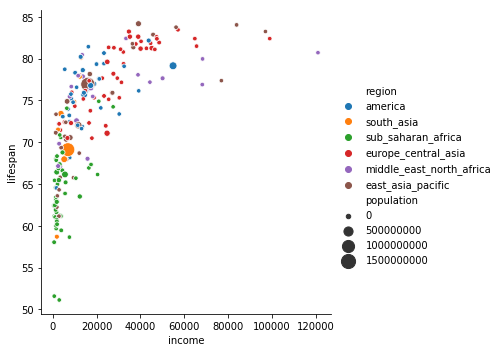

In [34]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(20,200), data=now);

In [35]:
now['income'].apply(lambda x: x > 800000)

218      False
437      False
656      False
875      False
1141     False
1360     False
1579     False
1798     False
2017     False
2236     False
2455     False
2674     False
2893     False
3112     False
3331     False
3550     False
3769     False
3988     False
4207     False
4426     False
4645     False
4864     False
5130     False
5349     False
5568     False
5787     False
6006     False
6225     False
6444     False
6663     False
         ...  
35221    False
35440    False
35659    False
35878    False
36097    False
36316    False
36535    False
36754    False
36973    False
37192    False
37411    False
37630    False
37849    False
38068    False
38287    False
38723    False
38942    False
39161    False
39380    False
39599    False
39818    False
40037    False
40256    False
40475    False
40694    False
40913    False
41132    False
41351    False
41570    False
41789    False
Name: income, Length: 188, dtype: bool

In [36]:
now[now.income > 80000]

,year,income,lifespan,population,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [37]:
entities[entities.name=='Macao, China']

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
145,mac,MACAU SPECIAL ADMINISTRATIVE REGION OF CHINA,Macau,Macao,"China, Macao SAR",Macau,"Macao SAR, China",NaN,NaN,NaN,...,22.20056,113.54611,eastern_religions,"Macao, China",NaN,False,MO,MACAU,asia,east_asia_pacific


In [0]:
qatar = now[now.country=='Qatar']
type(qatar.income.values[0])
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

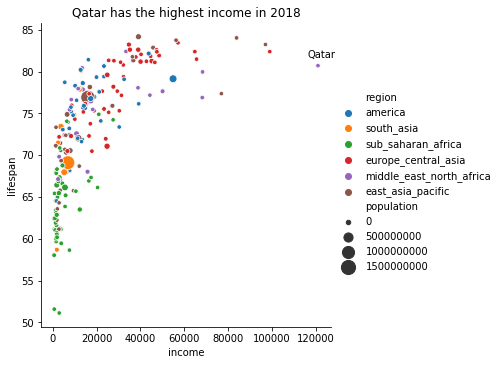

In [39]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(20,200), data=now)
plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')
plt.title('Qatar has the highest income in 2018');

In [0]:
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

In [41]:
centuries.head()

,year,income,lifespan,population,country,region
18,1818,835,34.42,19462,Aruba,america
118,1918,1765,22.32,32202,Aruba,america
218,2018,39219,76.14,105670,Aruba,america
237,1818,604,28.03,3308390,Afghanistan,south_asia
337,1918,849,7.89,5704092,Afghanistan,south_asia


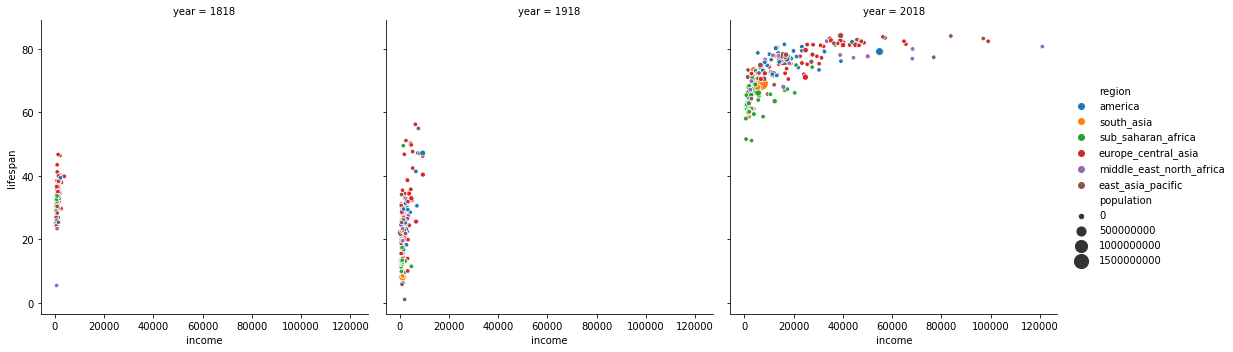

In [42]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            sizes=(20,200), data=centuries, col='year');


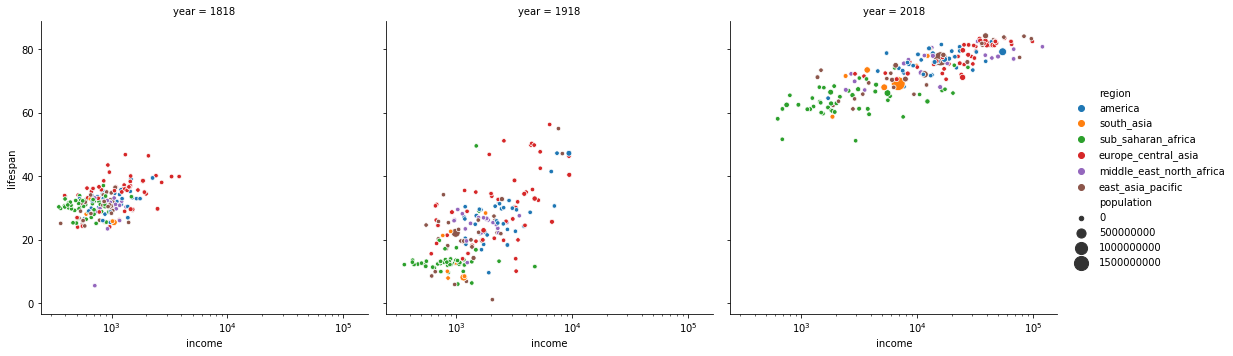

In [43]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            sizes=(20,200), data=centuries, col='year');
plt.xscale('log');

In [44]:
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [0]:
years_per_cuntry = centuries.groupby('country').year.count()


In [46]:
years_per_cuntry[years_per_cuntry<3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

In [0]:
years = [1918, 1938, 1958, 1978, 1998, 2018]
subset = df[df.year.isin(years)]

(150, 150000)

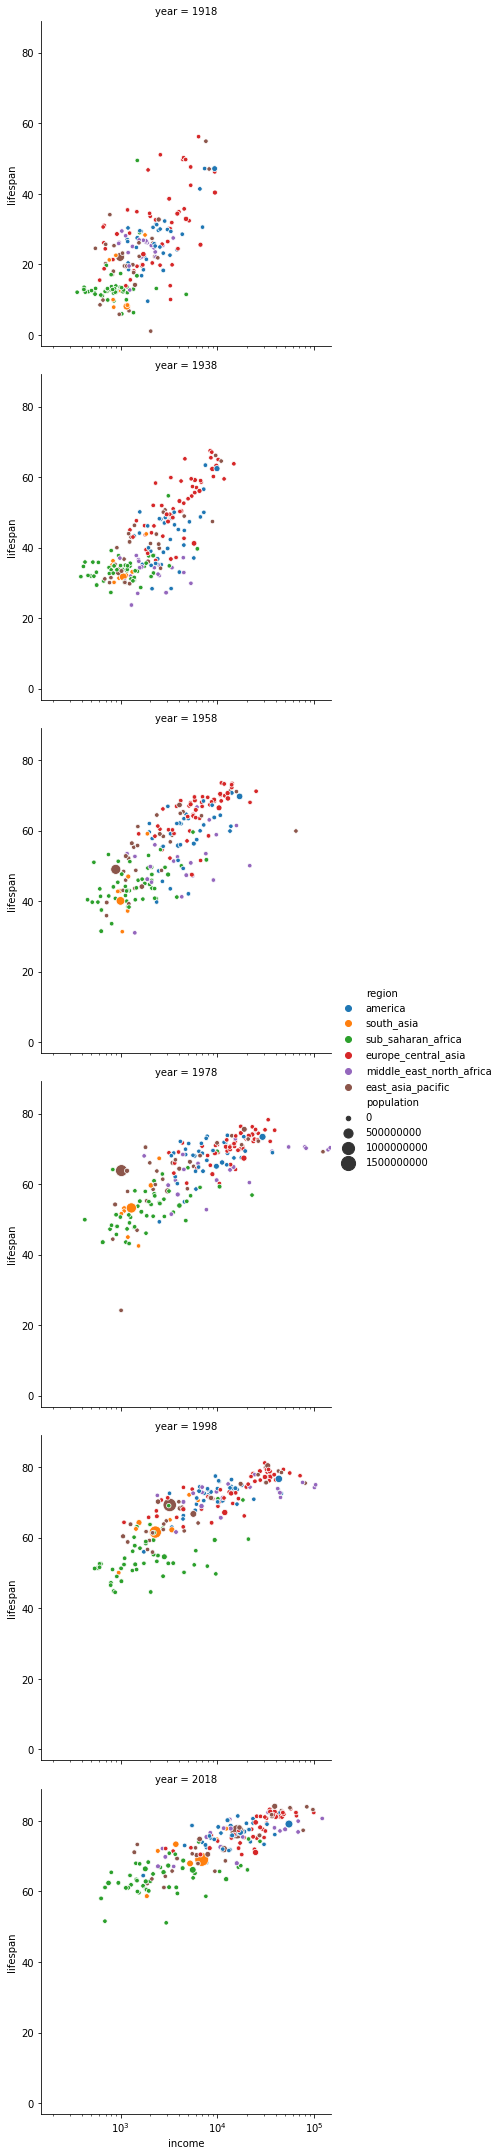

In [48]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            sizes=(20,200), data=subset, row='year');
plt.xscale('log');
plt.xlim((150, 150000))

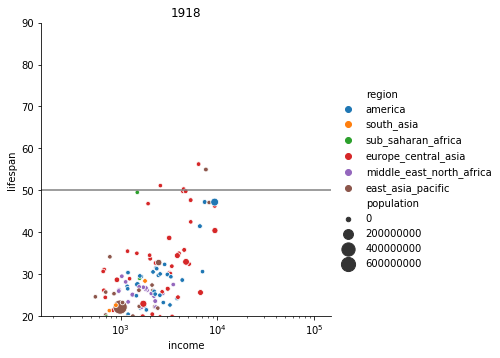

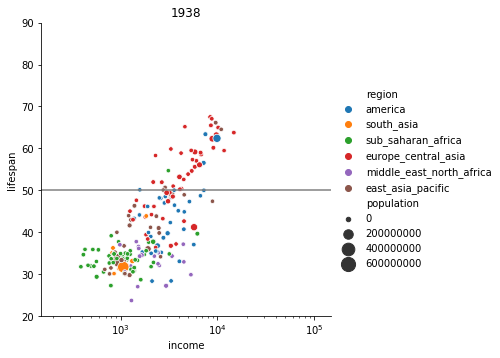

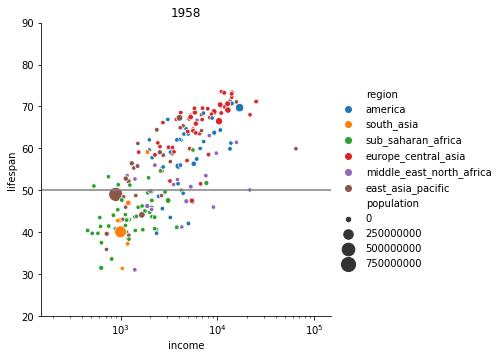

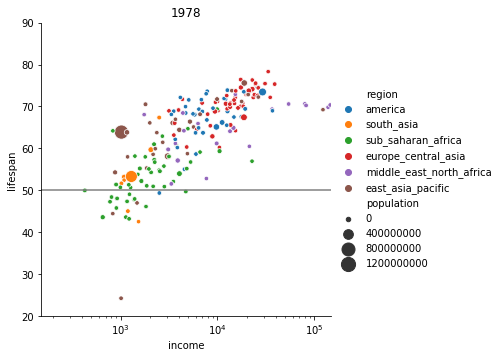

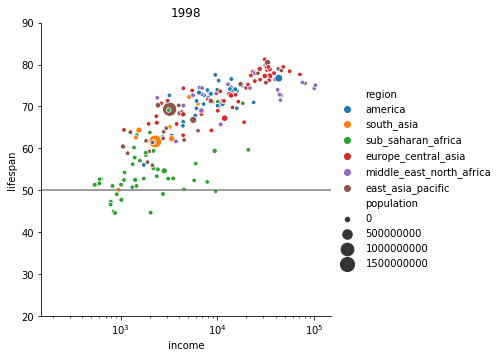

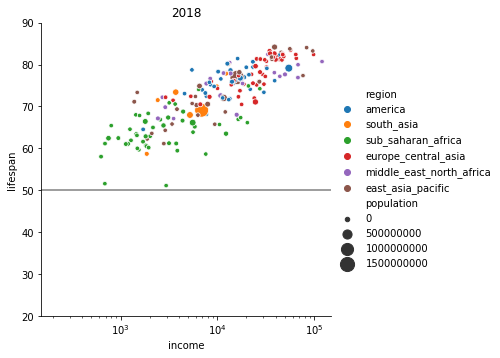

In [49]:
year = 1800 #@param {type:"slider", min:1800, max:2018, step:1}
for year in years:
  subset = df[df.year.isin(years)]
  sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            sizes=(20,200), data=df[df.year==year], row='year');
  plt.xscale('log');
  plt.xlim((150, 150000));
  plt.ylim((20, 90))
  plt.title(year)
  plt.axhline(y=50, color='grey')
  

##100 years ago, few countries had lifespans above 50 years

In [50]:
df[(df.year==1918) & (df.lifespan >= 50)]

,year,income,lifespan,population,country,region
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific
10333,1918,6393,56.24,3165276,Denmark,europe_central_asia
18211,1918,2576,51.11,115504,Iceland,europe_central_asia
28113,1918,4479,50.28,2576646,Norway,europe_central_asia


##Today, no countries have lifespans below 50 years

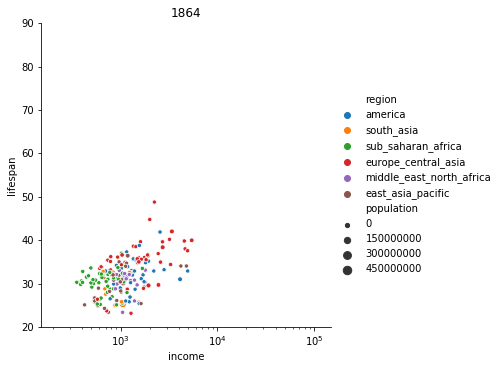

In [51]:
year = 1864 #@param {type:"slider", min:1800, max:2018, step:1}
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

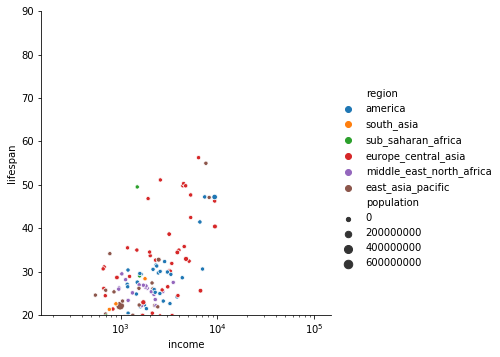

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

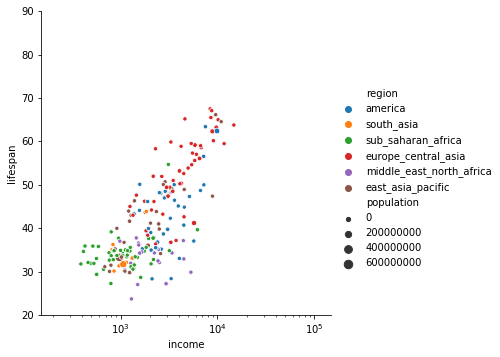

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

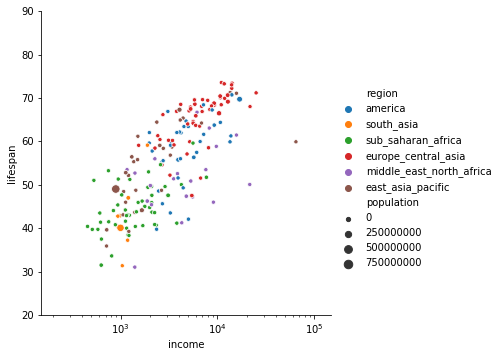

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

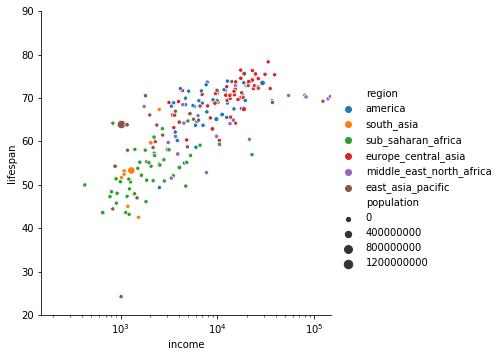

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

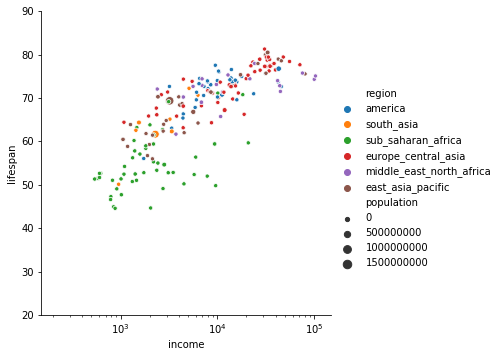

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

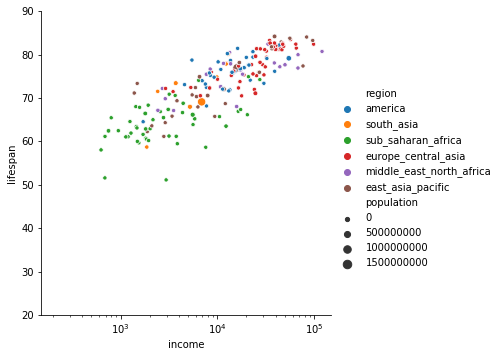

<IPython.core.display.Javascript object>

In [52]:
from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));

In [0]:
df_2 = pd.merge(income, lifespan)

In [0]:
df_2 = pd.merge(df_2, population)

In [55]:
df_2.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,abw,1800,833,34.42,19286
1,abw,1801,833,34.42,19286
2,abw,1802,833,34.42,19286
3,abw,1803,833,34.42,19286
4,abw,1804,833,34.42,19286


In [0]:
country_entities = entities[entities['is--country']]


In [57]:
country_entities.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
country,abkh,abw,afg,ago,aia,akr_a_dhe,ala,alb,and,ant,are,arg,arm,asm,ata,atg,aus,aut,aze,bdi
alt_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alternative_1,NaN,NaN,Islamic Republic of Afghanistan,NaN,NaN,NaN,√Öland,NaN,NaN,Neth. Antilles,UAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alternative_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alternative_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alternative_4_cdiac,NaN,Aruba,Afghanistan,Angola,NaN,NaN,NaN,Albania,NaN,Netherland Antilles,United Arab Emirates,Argentina,Armenia,NaN,NaN,Antigua & Barbuda,Australia,Austria,Azerbaijan,Burundi
arb1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arb2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arb3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arb4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
country_entities['name'].value_counts()

Greenland                                       1
Guam                                            1
Saudi Arabia                                    1
Marshall Islands                                1
South Georgia and the South Sandwich Islands    1
United Kingdom                                  1
El Salvador                                     1
Cape Verde                                      1
Jamaica                                         1
Reunion                                         1
Cameroon                                        1
China                                           1
British Virgin Islands                          1
Uganda                                          1
Namibia                                         1
Liberia                                         1
Bermuda                                         1
Qatar                                           1
United Arab Emirates                            1
South Africa                                    1


In [59]:
variables_2 = ['country', 'name', 'landlocked', 'world_6region']
country_entities[variables_2].head()

,country,name,landlocked,world_6region
0,abkh,Abkhazia,NaN,europe_central_asia
1,abw,Aruba,coastline,america
2,afg,Afghanistan,landlocked,south_asia
3,ago,Angola,coastline,sub_saharan_africa
4,aia,Anguilla,coastline,america


In [0]:
country_df = country_entities[variables_2]

In [61]:
country_df.head()

,country,name,landlocked,world_6region
0,abkh,Abkhazia,NaN,europe_central_asia
1,abw,Aruba,coastline,america
2,afg,Afghanistan,landlocked,south_asia
3,ago,Angola,coastline,sub_saharan_africa
4,aia,Anguilla,coastline,america


In [62]:
df_2.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,abw,1800,833,34.42,19286
1,abw,1801,833,34.42,19286
2,abw,1802,833,34.42,19286
3,abw,1803,833,34.42,19286
4,abw,1804,833,34.42,19286


In [0]:
df_merged = pd.merge(df_2, country_df,
        how='inner', left_on='geo', right_on='country')

In [64]:
df_merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,landlocked,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,coastline,america
1,abw,1801,833,34.42,19286,abw,Aruba,coastline,america
2,abw,1802,833,34.42,19286,abw,Aruba,coastline,america
3,abw,1803,833,34.42,19286,abw,Aruba,coastline,america
4,abw,1804,833,34.42,19286,abw,Aruba,coastline,america


In [0]:
df_merged.drop(columns=['geo','country'], inplace=True)
df_merged.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
    
}, inplace=True)

In [66]:
df_merged.head()

,year,income,lifespan,population,country,landlocked,region
0,1800,833,34.42,19286,Aruba,coastline,america
1,1801,833,34.42,19286,Aruba,coastline,america
2,1802,833,34.42,19286,Aruba,coastline,america
3,1803,833,34.42,19286,Aruba,coastline,america
4,1804,833,34.42,19286,Aruba,coastline,america


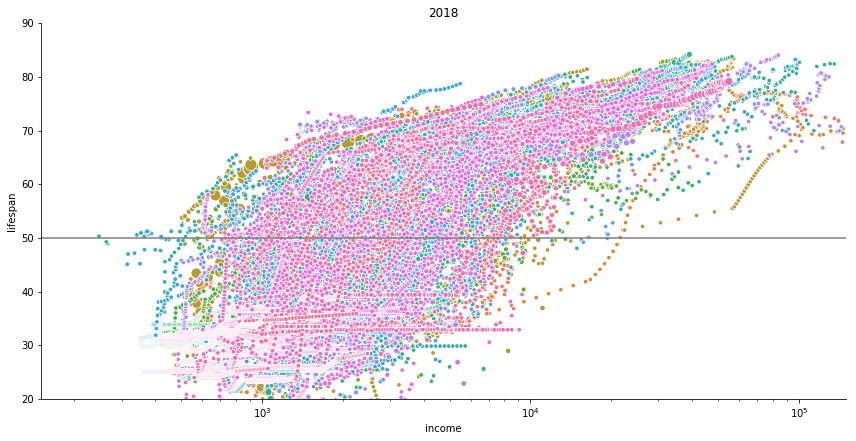

In [67]:
sns.relplot(x='income', y='lifespan', hue='country', size='population', 
          sizes=(20,200), data=df_merged, height=6, aspect=2, legend=False);
plt.xscale('log');
plt.xlim((150, 150000));
plt.ylim((20, 90))
plt.title(year)
plt.axhline(y=50, color='grey');


In [68]:
df_merged.head()

,year,income,lifespan,population,country,landlocked,region
0,1800,833,34.42,19286,Aruba,coastline,america
1,1801,833,34.42,19286,Aruba,coastline,america
2,1802,833,34.42,19286,Aruba,coastline,america
3,1803,833,34.42,19286,Aruba,coastline,america
4,1804,833,34.42,19286,Aruba,coastline,america


In [0]:
years = [1818, 1918, 2018]
subset2 = df_merged[df_merged.year.isin(years)]

In [0]:
#Comparing coastal and landlocked countries lifespan change over the years
coastal = subset2[subset2.landlocked == 'coastline']
landlocked = subset2[subset2.landlocked == 'landlocked']

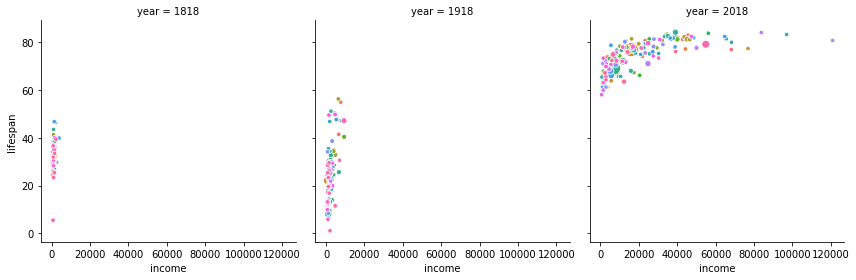

In [71]:
sns.relplot(x='income', y='lifespan', hue='country', size='population', 
            sizes=(20,200), data=coastal, col='year', height=4, aspect=1, legend=False);

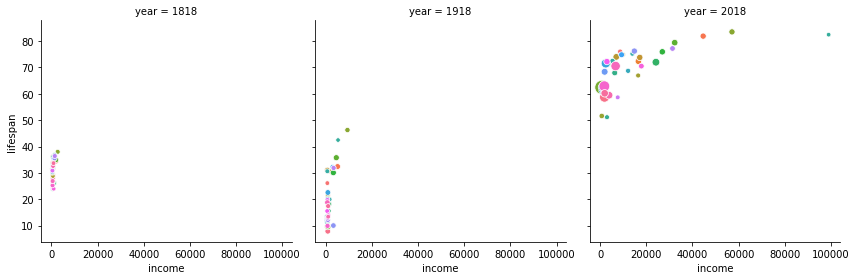

In [72]:
sns.relplot(x='income', y='lifespan', hue='country', size='population', 
            sizes=(20,200), data=landlocked, col='year', height=4, aspect=1, legend=False);


In [93]:
dp.region.unique()

array(['america', 'south_asia', 'sub_saharan_africa',
       'europe_central_asia', 'middle_east_north_africa',
       'east_asia_pacific'], dtype=object)

In [124]:
dp = df_merged.copy()
dp.info()
dp = df_merged.tail(1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41790 entries, 0 to 41789
Data columns (total 7 columns):
year          41790 non-null int64
income        41790 non-null int64
lifespan      41790 non-null float64
population    41790 non-null int64
country       41790 non-null object
landlocked    41790 non-null object
region        41790 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 2.6+ MB


In [125]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 40790 to 41789
Data columns (total 7 columns):
year          1000 non-null int64
income        1000 non-null int64
lifespan      1000 non-null float64
population    1000 non-null int64
country       1000 non-null object
landlocked    1000 non-null object
region        1000 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 62.5+ KB


In [0]:
 !pip install plotly --upgrade

In [74]:
import plotly
plotly.__version__

'3.4.1'

In [0]:
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
import plotly.figure_factory as FF
import time

In [127]:
table = FF.create_table(dp.head(10))
py.iplot(table, filename='regions_lifespan')

In [0]:
years_from_col = set(dp['year'])
years_ints = sorted(list(years_from_col))
years = [str(year) for year in years_ints]

In [137]:
print(years)

['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837', '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924',

In [0]:
# make list of regions
regions = []
for region in dp['region']:
    if region not in regions: 
        regions.append(region)

In [139]:
print(regions)

['east_asia_pacific', 'middle_east_north_africa', 'sub_saharan_africa']


In [140]:
columns = []
# make grid
for year in years:
    for region in regions:
        dp_by_year = dp[dp['year'] == int(year)]
        dp_by_year_and_reg = dp_by_year[dp_by_year['region'] == region]
        for col_name in dp_by_year_and_reg:
            # each column name is unique
            column_name = '{year}_{region}_{header}_lifespan_grid'.format(
                year=year, region=region, header=col_name
            )
            a_column = Column(list(dp_by_year_and_reg[col_name]), column_name)
            columns.append(a_column)
            
print(columns)

'https://plot.ly/~Zarrina/7/'

In [141]:
print(columns)

[Column("[]", 1800_east_asia_pacific_year_lifespan_grid), Column("[]", 1800_east_asia_pacific_income_lifespan_grid), Column("[]", 1800_east_asia_pacific_lifespan_lifespan_grid), Column("[]", 1800_east_asia_pacific_population_lifespan_grid), Column("[]", 1800_east_asia_pacific_country_lifespan_grid), Column("[]", 1800_east_asia_pacific_landlocked_lifespan_grid), Column("[]", 1800_east_asia_pacific_region_lifespan_grid), Column("[1800]", 1800_middle_east_north_africa_year_lifespan_grid), Column("[877]", 1800_middle_east_north_africa_income_lifespan_grid), Column("[23.39]", 1800_middle_east_north_africa_lifespan_lifespan_grid), Column("[2593000]", 1800_middle_east_north_africa_population_lifespan_grid), Column("['Yemen']", 1800_middle_east_north_africa_country_lifespan_grid), Column("['coastline']", 1800_middle_east_north_africa_landlocked_lifespan_grid), Column("['middle_east_north_africa']", 1800_middle_east_north_africa_region_lifespan_grid), Column("[1800, 1800, 1800]", 1800_sub_sahar

In [132]:
# upload grid
grid = Grid(columns)
url = py.grid_ops.upload(grid, 'lifespan_grid'+str(time.time()), auto_open=False)
url

'https://plot.ly/~Zarrina/6/'

In [0]:
figure = {
    'data': [],
    'layout': {},
    'frames': [],
    'config': {'scrollzoom': True}
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [30, 85], 'title': 'Lifespan', 'gridcolor': '#FFFFFF'}
figure['layout']['yaxis'] = {'title': 'Income', 'type': 'log', 'gridcolor': '#FFFFFF'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['plot_bgcolor'] = 'rgb(223, 232, 243)'

In [0]:
figure['layout']['sliders'] = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'text-before-value-on-display',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': [...]
}

In [0]:
{
    'method': 'animate',
    'label': 'label-for-frame',
    'value': 'value-for-frame(defaults to label)',
    'args': [{'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate'}
    ],
}

In [0]:
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [0]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

custom_colors = {
    'america': 'rgb(171, 99, 250)',
    'south_asia': 'rgb(230, 99, 250)',
    'sub_saharan_africa': 'rgb(99, 110, 250)',
    'europe_central_asia': 'rgb(25, 211, 243)',
    'middle_east_north_africa': 'rgb(50, 170, 255)',
    'east_asia_pacific': 'rgb(50, 170, 115)'
}

In [0]:
col_name_template = '{year}_{region}_{header}_lifespan_grid'
year = 2018
for region in regions:
    data_dict = {
        'xsrc': grid.get_column_reference(col_name_template.format(
            year=year, region=region, header='lifespan'
        )),
        'ysrc': grid.get_column_reference(col_name_template.format(
            year=year, region=region, header='income'
        )),
        'mode': 'markers',
        'textsrc': grid.get_column_reference(col_name_template.format(
            year=year, region=region, header='region'
        )),
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'sizesrc': grid.get_column_reference(col_name_template.format(
                 year=year, region=region, header='population'
            )),
            'color': custom_colors[region]
        },
        'name': region
    }
    figure['data'].append(data_dict)

In [0]:
frame = {'data': [], 'name': value-name}


In [0]:
figure['layout']['sliders'] = [sliders_dict]


In [0]:
for year in years:
    frame = {'data': [], 'name': str(year)}
    for region in regions:
        data_dict = {
            'xsrc': grid.get_column_reference(col_name_template.format(
                year=year, region=region, header='lifespan'
            )),
            'ysrc': grid.get_column_reference(col_name_template.format(
                year=year, region=region, header='income'
            )),
            'mode': 'markers',
            'textsrc': grid.get_column_reference(col_name_template.format(
                year=year, region=region, header='region'
                )),
            'marker': {
                'sizemode': 'area',
                'sizeref': 200000,
                'sizesrc': grid.get_column_reference(col_name_template.format(
                    year=year, region=region, header='population'
                )),
                'color': custom_colors[region]
            },
            'name': region
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['sliders'] = [sliders_dict]

In [0]:
py.icreate_animations(figure, 'lifespan_example'+str(time.time()))